<a href="https://colab.research.google.com/github/SebLynch5/Reinforcement-Learning/blob/main/Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing gridworld
!git clone https://github.com/prasenjit52282/GridWorld.git

import os

os.chdir('GridWorld')

Cloning into 'GridWorld'...
remote: Enumerating objects: 513, done.
remote: Counting objects: 100% (180/180), done.
remote: Compressing objects: 100% (113/113), done.
remote: Total 513 (delta 68), reused 154 (delta 65), pack-reused 333 (from 1)
Receiving objects: 100% (513/513), 60.59 MiB | 15.94 MiB/s, done.
Resolving deltas: 100% (220/220), done.
Updating files: 100% (118/118), done.


/usr/local/lib/python3.11/dist-packages/pygame/pkgdata.py:25: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import resource_stream, resource_exists
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-packages
  declare_namespace(pkg)
/usr/local/lib/python3.11/dist-packages/pkg_resources/__init__.py:3154: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google.cloud')`.
Implementing implicit namespace packages (as specified in PEP 420) is preferred to `pkg_resources.declare_namespace`. See https://setuptools.pypa.io/en/latest/references/keywords.html#keyword-namespace-pa

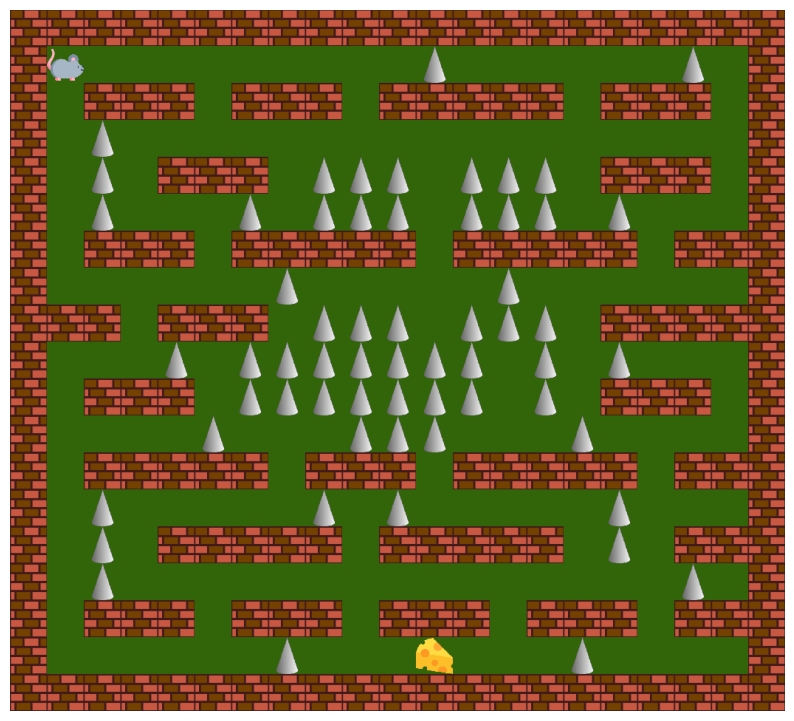

In [ ]:
# Initialising specified environment and plotting it
import numpy as np
from gridworld import GridWorld
import numpy as np
from gridworld import GridWorld
import matplotlib.pyplot as plt

world=\
    """
    wwwwwwwwwwwwwwwwwwwww
    wa         o      o w
    w www www wwwww www w
    w o                 w
    w o www ooo ooo www w
    w o   o ooo ooo o   w
    w www wwwww wwwww www
    w      o     o      w
    www www ooo ooo wwwww
    w   o ooooooo o o   w
    w www ooooooo o www w
    w    o   ooo   o    w
    w wwwww www wwwww www
    w o     o o     o   w
    w o wwwww wwwww o www
    w o               o w
    w www www www www www
    w      o   g   o    w
    wwwwwwwwwwwwwwwwwwwww
    """
env=GridWorld(world,slip=0)
screenshot = env.getScreenshot()
plt.figure(figsize=(10, 10))

plt.imshow(screenshot)

plt.axis('off')

plt.show()

[[-3.33205798e+00 -3.33073057e+00 -3.33151140e+00 -3.33151140e+00]
 [-3.33244058e+00 -3.33205798e+00 -3.33151140e+00 -3.33205798e+00]
 [-3.33270841e+00 -3.33244058e+00 -3.33205798e+00 -3.33244058e+00]
 [-3.33289589e+00 -3.33270841e+00 -3.33244058e+00 -3.33270841e+00]
 [-3.33302712e+00 -3.33270841e+00 -3.33270841e+00 -3.33289589e+00]
 [-3.33311899e+00 -3.33302712e+00 -3.33289589e+00 -3.33302712e+00]
 [-3.33318329e+00 -3.33311899e+00 -3.33302712e+00 -3.33311899e+00]
 [-3.33322830e+00 -3.33318329e+00 -3.33311899e+00 -3.33318329e+00]
 [-3.33325981e+00 -3.33318329e+00 -3.33318329e+00 -3.33322830e+00]
 [-1.02333282e+02 -3.33325981e+00 -3.33322830e+00 -3.33325981e+00]
 [-3.33332910e+00 -1.02333282e+02 -3.33325981e+00 -1.02333282e+02]
 [-3.33332728e+00 -3.33332910e+00 -1.02333282e+02 -3.33332910e+00]
 [-3.33332468e+00 -3.33332728e+00 -3.33332910e+00 -3.33332728e+00]
 [-3.33332098e+00 -3.33332468e+00 -3.33332728e+00 -3.33332468e+00]
 [-3.33332468e+00 -3.33331568e+00 -3.33332468e+00 -3.33332098e

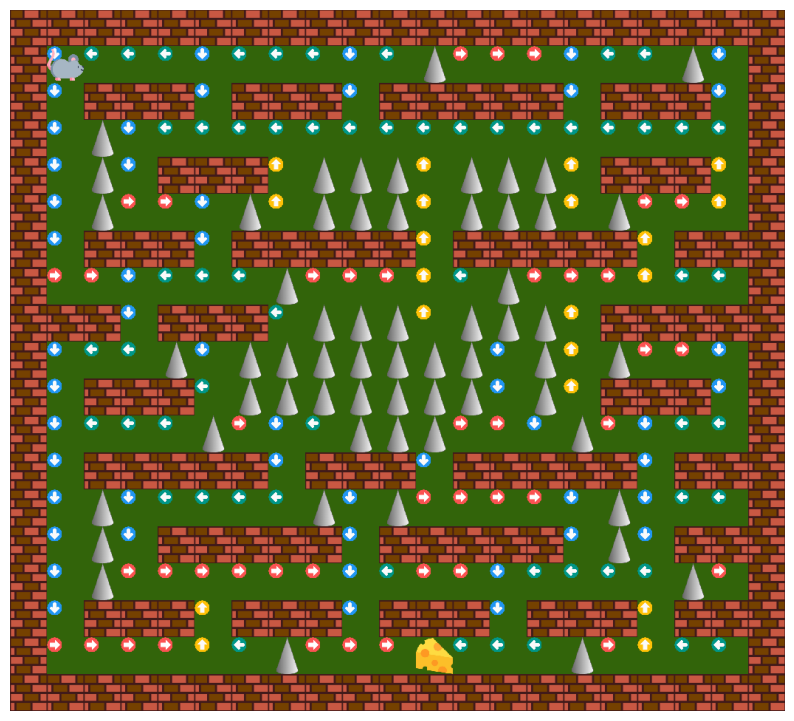

In [ ]:
# Value Iteration implementation

V=np.zeros((env.state_count,1)) # initialisation (zeros)

V_prev=np.random.random((env.state_count,1)) # initialisation (random vals)

eps=1e-7 # convergence threshold

gamma=0.7 # discount factor


# VI algorithm:
while np.abs(V-V_prev).sum()>eps:

    Q_sa=env.R_sa+gamma*np.squeeze(np.matmul(env.P_sas,V),axis=2)

    V_prev=V.copy()

    V=np.max(Q_sa,axis=1,keepdims=True)

pi=np.argmax(Q_sa,axis=1)

print(Q_sa)

print("Pi:",pi)

screenshot = env.getScreenshot(pi)  # Get the screenshot

# Use the imshow method from matplotlib to display the image

plt.figure(figsize=(10, 10))  #  Adjust the image size as needed

plt.imshow(screenshot)

plt.axis('off')  # Hide the coordinate axis

plt.show()

# Note: env.show(pi) cannot be used in Colab as it does not support real-time interactive windows

# If you are using a local environment such as VS Code, you could use this method to display an interactive window

[[  -7.24652894   -6.60065302   -6.94058772   -6.94058772]
 [  -7.52187605   -7.24652894   -6.94058772   -7.24652894]
 [  -7.80181399   -7.52236979   -7.24652894   -7.52235606]
 [  -9.41108477   -8.36864965   -7.52846358   -7.97261623]
 [  -9.35049824   -9.35037571   -9.43515805   -9.40080594]
 [  -9.28856005   -9.32948568   -9.37126682   -9.33503076]
 [  -9.21771734   -9.28050877   -9.32125858   -9.25791938]
 [  -9.13825751   -9.15342356   -9.25764218   -9.18731922]
 [  -9.09539435   -9.05009254   -9.1700726    -9.06483459]
 [ -99.99973483   -9.03203479   -9.08264733   -9.049561  ]
 [   0.            0.            0.            0.        ]
 [  -7.88511357   -7.8420145   -99.88601105   -7.86903219]
 [  -7.8903581    -7.89398355   -7.86349954   -7.85427422]
 [  -7.95157454   -7.94930321   -7.90420609   -7.97048151]
 [  -7.91908224   -7.90353012   -7.92526673   -7.98025536]
 [  -7.87480816   -7.85880228   -7.85781313   -7.86103873]
 [ -99.99061252   -7.80339594   -7.89292672   -7.7592812

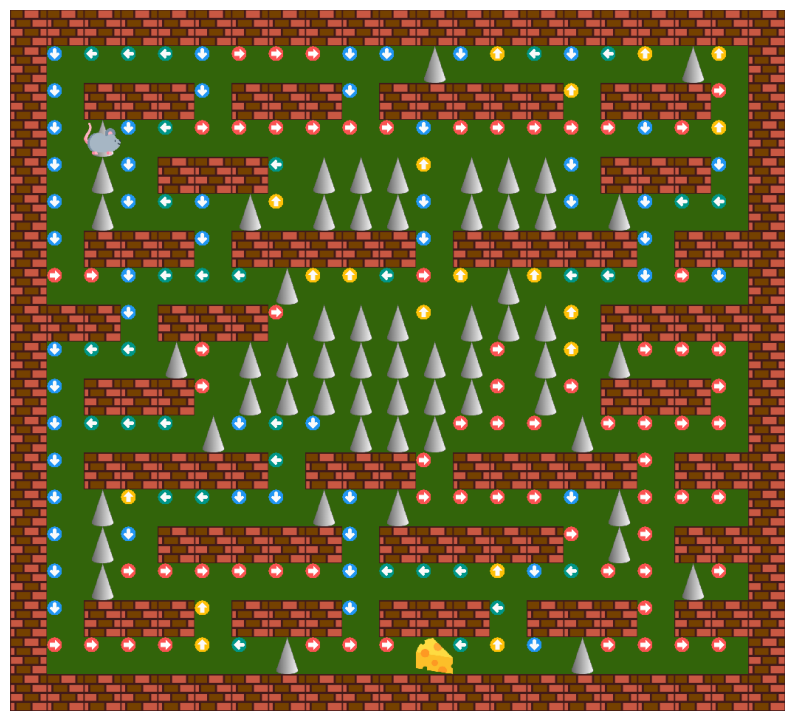

In [ ]:
# Q-learning implementation
import numpy as np
from gridworld import GridWorld
import numpy as np
from gridworld import GridWorld
import matplotlib.pyplot as plt
import random
# Q-learning parameters

alpha = 0.3  # Learning rate

gamma = 0.9  # Discount factor

epsilon = 0.4  # Exploration rate

episodes = 10000  # Total number of episodes to train



# Initialise Q-table

Q = np.zeros((env.state_count, 4))



for episode in range(episodes):

    state = env.reset()  # Reset environment to start a new episode

    done = False



    while not done:

        # Epsilon-greedy policy for exploration and exploitation

        if random.uniform(0, 1) < epsilon:

            action = env.random_action()  # Explore action space

        else:

            action = np.argmax(Q[state])  # Exploit learned values



        # Take action, observe new state and reward

        next_state, reward, done, _ = env.step(action)



        # Q-learning formula

        best_next_action = np.argmax(Q[next_state])  # Best action for next state

        td_target = reward + gamma * Q[next_state][best_next_action]

        td_error = td_target - Q[state][action]

        Q[state][action] += alpha * td_error



        state = next_state  # Move to next state

# Derive policy from Q-table

print(Q)

pi = np.argmax(Q, axis=1)

print("Pi:", pi)

screenshot = env.getScreenshot(pi)  # Get the screenshot

# Use the imshow method from matplotlib to display the image

plt.figure(figsize=(10, 10))  #  Adjust the image size as needed

plt.imshow(screenshot)

plt.axis('off')  # Hide the coordinate axis

plt.show()


[[  -8.90177041   -9.10987208   -9.01123927   -9.01107   ]
 [  -8.780159     -8.90141544   -9.01100468   -8.90123611]
 [  -8.64497236   -8.77994257   -8.9015455    -8.77998968]
 [  -8.49468128   -8.64378516   -8.77982413   -8.64407357]
 [  -8.32907256   -8.32769754   -8.64468311   -8.49338114]
 [  -8.14452414   -8.32569274   -8.49382303   -8.32673377]
 [  -7.93964897   -8.14240751   -8.32938046   -8.14367778]
 [  -7.7118541    -7.93780068   -8.1431096    -7.93938595]
 [  -7.93465364   -7.45809481   -7.9394811    -7.70846909]
 [-100.           -7.93001034   -7.70730423   -7.92860006]
 [   0.            0.            0.            0.        ]
 [  -3.66994272   -3.54104699  -98.02267326   -3.56642446]
 [  -4.0204198    -3.87913582   -3.87418103   -3.87872865]
 [  -3.80394397   -3.85661262   -3.83972917   -4.01930788]
 [  -3.82188737   -4.37374469   -3.96316226   -4.0740058 ]
 [  -3.38123067   -3.38704526   -3.92163765   -3.34319172]
 [ -99.0311099    -3.0571116    -3.03802945   -2.9293281

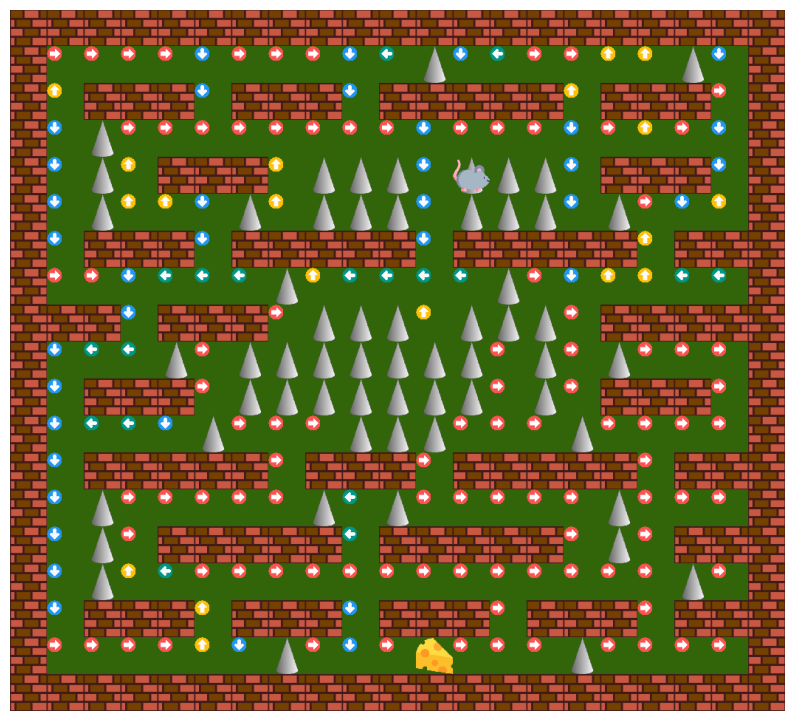

In [ ]:
# Q-learning 2 - High exploration rate
import numpy as np
from gridworld import GridWorld
import numpy as np
from gridworld import GridWorld
import matplotlib.pyplot as plt
import random
# Q-learning parameters

alpha = 0.3  # Learning rate

gamma = 0.9  # Discount factor

epsilon = 0.7  # Exploration rate

episodes = 10000  # Total number of episodes to train



# Initialize Q-table

Q = np.zeros((env.state_count, 4))



for episode in range(episodes):

    state = env.reset()  # Reset environment to start a new episode

    done = False



    while not done:

        # Epsilon-greedy policy for exploration and exploitation

        if random.uniform(0, 1) < epsilon:

            action = env.random_action()  # Explore action space

        else:

            action = np.argmax(Q[state])  # Exploit learned values



        # Take action, observe new state and reward

        next_state, reward, done, _ = env.step(action)



        # Q-learning formula

        best_next_action = np.argmax(Q[next_state])  # Best action for next state

        td_target = reward + gamma * Q[next_state][best_next_action]

        td_error = td_target - Q[state][action]

        Q[state][action] += alpha * td_error



        state = next_state  # Move to next state

# Derive policy from Q-table

print(Q)

pi = np.argmax(Q, axis=1)

print("Pi:", pi)

screenshot = env.getScreenshot(pi)  # Get the screenshot

# Use the imshow method from matplotlib to display the image

plt.figure(figsize=(10, 10))  #  Adjust the image size as needed

plt.imshow(screenshot)

plt.axis('off')  # Hide the coordinate axis

plt.show()


[[-3.33294189e+00 -3.33253446e+00 -3.33277412e+00 -3.33277412e+00]
 [-3.33305932e+00 -3.33294189e+00 -3.33277412e+00 -3.33294189e+00]
 [-3.33314930e+00 -3.33305936e+00 -3.33294189e+00 -3.33305939e+00]
 [-3.33313089e+00 -3.33317737e+00 -3.33306147e+00 -3.33317528e+00]
 [-3.33304936e+00 -3.33305023e+00 -3.33317251e+00 -3.33309961e+00]
 [-3.33294678e+00 -3.33299839e+00 -3.33306642e+00 -3.33297690e+00]
 [-3.33279161e+00 -3.33291653e+00 -3.33298755e+00 -3.33285876e+00]
 [-3.33258024e+00 -3.33274656e+00 -3.33290238e+00 -3.33274321e+00]
 [-3.33263861e+00 -3.33227487e+00 -3.33273631e+00 -3.33239885e+00]
 [-9.99977461e+01 -3.33261466e+00 -3.33249676e+00 -3.33248673e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-3.31260680e+00 -3.31563893e+00 -9.98860110e+01 -3.31434187e+00]
 [-3.31269356e+00 -3.31440975e+00 -3.31452821e+00 -3.31305318e+00]
 [-3.31271393e+00 -3.31441438e+00 -3.31420195e+00 -3.31340271e+00]
 [-3.31472553e+00 -3.31479599e+00 -3.31386716e+00 -3.31400101e

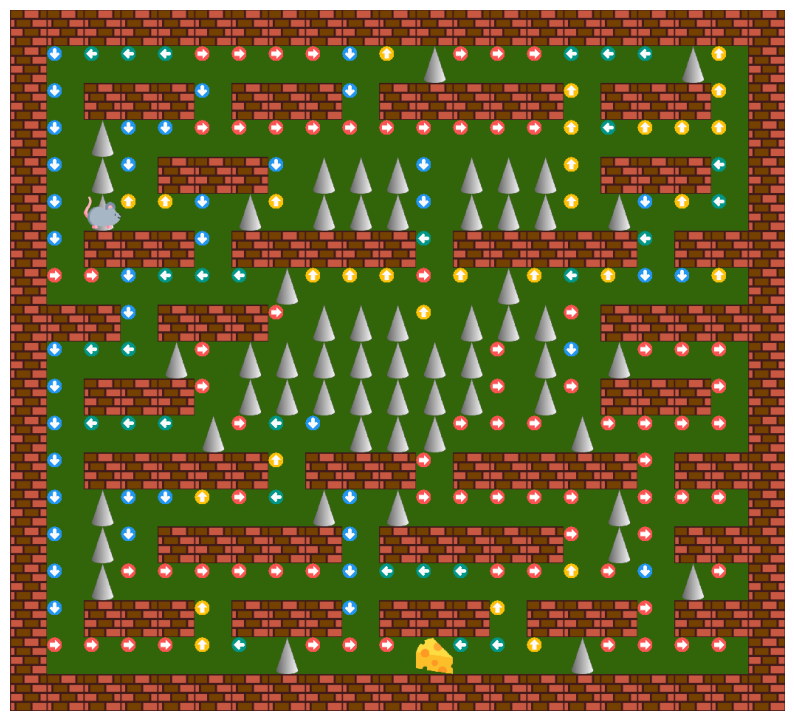

In [ ]:
# Q-learning 3 - lower discount factor
import numpy as np
from gridworld import GridWorld
import numpy as np
from gridworld import GridWorld
import matplotlib.pyplot as plt
import random
# Q-learning parameters

alpha = 0.3  # Learning rate

gamma = 0.7  # Discount factor

epsilon = 0.4  # Exploration rate

episodes = 10000  # Total number of episodes to train



# Initialize Q-table

Q = np.zeros((env.state_count, 4))



for episode in range(episodes):

    state = env.reset()  # Reset environment to start a new episode

    done = False



    while not done:

        # Epsilon-greedy policy for exploration and exploitation

        if random.uniform(0, 1) < epsilon:

            action = env.random_action()  # Explore action space

        else:

            action = np.argmax(Q[state])  # Exploit learned values



        # Take action, observe new state and reward

        next_state, reward, done, _ = env.step(action)



        # Q-learning formula

        best_next_action = np.argmax(Q[next_state])  # Best action for next state

        td_target = reward + gamma * Q[next_state][best_next_action]

        td_error = td_target - Q[state][action]

        Q[state][action] += alpha * td_error



        state = next_state  # Move to next state

# Derive policy from Q-table

print(Q)

pi = np.argmax(Q, axis=1)

print("Pi:", pi)

screenshot = env.getScreenshot(pi)  # Get the screenshot

# Use the imshow method from matplotlib to display the image

plt.figure(figsize=(10, 10))  #  Adjust the image size as needed

plt.imshow(screenshot)

plt.axis('off')  # Hide the coordinate axis

plt.show()


Q-Learning Policy: [1 2 2 2 1 0 0 0 1 1 0 1 3 3 0 3 3 0 0 1 1 1 3 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 3 0 0 1 1 0 3 2 0 0 0 1 0 0 0 0 1 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 2
 1 1 1 1 1 0 0 1 2 2 2 0 3 2 3 0 3 0 0 1 1 2 3 0 1 0 0 0 0 3 0 0 0 0 1 2 2
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 2 0 3 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 3 2 1 2 3 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 1 0 0 0 0 0 0 0 1 2 2 2 2 1 1 1 1 0 0 1 3 1 2 0 0 0 0 0 3 2 0 0 0
 0 0 0 1 2 0 0 0 0 0]
Value Iteration Policy: [1 2 2 2 1 2 2 2 1 2 2 0 0 0 1 2 2 2 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 1 3 2 3 3 3 2 3 3 3 3 1 2 0 0 1 2 3 2 2 0 3 2 2 0 3 2 0 0
 3 1 1 3 3 0 0 1 2 2 2 2 0 0 0 3 2 2 0 0 0 3 2 2 1 2 3 3 0 3 2 1 0 3 1 2 2
 2 1 2 3 1 3 0 3 0 1 0 3 0 0 0 1 1 2 1 1 1 1 0 1 0 1 0 3 1 1 2 2 2 0 0 1 2
 2 0 1 0 0 1 0 0 1 2 2 1 1 1 1 1 0 1 2 2 2 2 0 1 2 0 0 0 0 1 2 1 2 2 1 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 1 2 0 0 1 2 2 2 2 2 0 1 3 1 1 3 0 0 0 0 3 2 0 0 0
 0 1 2 2 2 2 0 3 2 2]


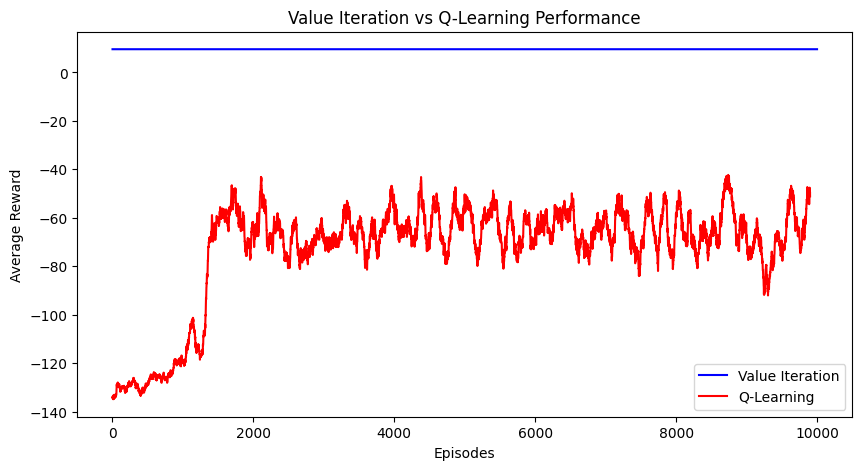

In [ ]:
# Comparing both methods
import numpy as np
import matplotlib.pyplot as plt
import random
from gridworld import GridWorld

# Q-learning parameters
alpha = 0.3  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.4  # Exploration rate
episodes = 10000  # Total number of episodes to train

# Initialize Q-table
Q = np.zeros((env.state_count, 4))
q_learning_rewards = []

for episode in range(episodes):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        # Epsilon-greedy policy
        if random.uniform(0, 1) < epsilon:
            action = env.random_action()
        else:
            action = np.argmax(Q[state])

        # Take action, observe new state and reward
        next_state, reward, done, _ = env.step(action)
        total_reward += reward

        # Q-learning update
        best_next_action = np.argmax(Q[next_state])
        td_target = reward + gamma * Q[next_state][best_next_action]
        Q[state][action] += alpha * (td_target - Q[state][action])
        state = next_state

    q_learning_rewards.append(total_reward)

# Derive policy from Q-table
pi_q = np.argmax(Q, axis=1)
print("Q-Learning Policy:", pi_q)

# Value Iteration Implementation
V = np.zeros((env.state_count, 1))
V_prev = np.random.random((env.state_count, 1))
eps = 1e-7
gamma = 0.7
value_iteration_rewards = []

while np.abs(V - V_prev).sum() > eps:
    Q_sa = env.R_sa + gamma * np.squeeze(np.matmul(env.P_sas, V), axis=2)
    V_prev = V.copy()
    V = np.max(Q_sa, axis=1, keepdims=True)

pi_vi = np.argmax(Q_sa, axis=1)
print("Value Iteration Policy:", pi_vi)

# Simulate reward tracking for Value Iteration
for episode in range(episodes):
    total_reward = np.mean(V)
    value_iteration_rewards.append(total_reward)

# Apply moving average smoothing
window_size = 100
q_learning_smooth = np.convolve(q_learning_rewards, np.ones(window_size)/window_size, mode='valid')

# Plot the reward comparison
plt.figure(figsize=(10, 5))
plt.plot(range(1, episodes + 1), value_iteration_rewards, label="Value Iteration", color="blue")
plt.plot(range(1, episodes - window_size + 2), q_learning_smooth, label="Q-Learning", color="red")
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Value Iteration vs Q-Learning Performance")
plt.legend()
plt.show()



Q-Learning Policy: [1 2 2 0 2 3 0 1 0 1 0 3 3 3 2 1 2 0 1 1 0 1 2 1 1 0 3 2 0 1 0 0 0 3 2 0 2
 2 2 1 0 3 1 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 3 1 2 0 3 0 0 0 1 0 0 0 1 0 0 1
 3 1 3 2 3 0 0 1 2 2 3 0 3 2 2 0 3 0 3 0 0 1 3 0 1 0 0 0 0 3 0 0 0 3 1 2 2
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 2 0 1 1 2
 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 1 0 1 3 1 1 3 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 1 0 0 1 0 0 0 0 0 0 0 1 2 2 1 0 1 0 1 1 0 0 1 3 1 3 0 0 0 0 0 3 2 0 0 0
 0 0 2 1 1 0 0 0 0 0]
[[  -7.24652894   -6.60065302   -6.94058772   -6.94058772]
 [  -9.08177877   -7.63085803   -6.94058772   -7.62987569]
 [  -9.45884694   -9.47393516   -8.0114936    -9.46071802]
 [  -9.41586017   -9.423369     -9.43681997   -9.41643344]
 [  -9.37025482   -9.36993249   -9.3652019    -9.37898554]
 [  -9.34490912   -9.35318837   -9.35070793   -9.33681612]
 [  -9.31391751   -9.32133597   -9.32566533   -9.317199  ]
 [  -9.27797419   -9.27363714   -9.2891181    -9.28692105]
 [  -9.23271079   -9.24836406   -9.26

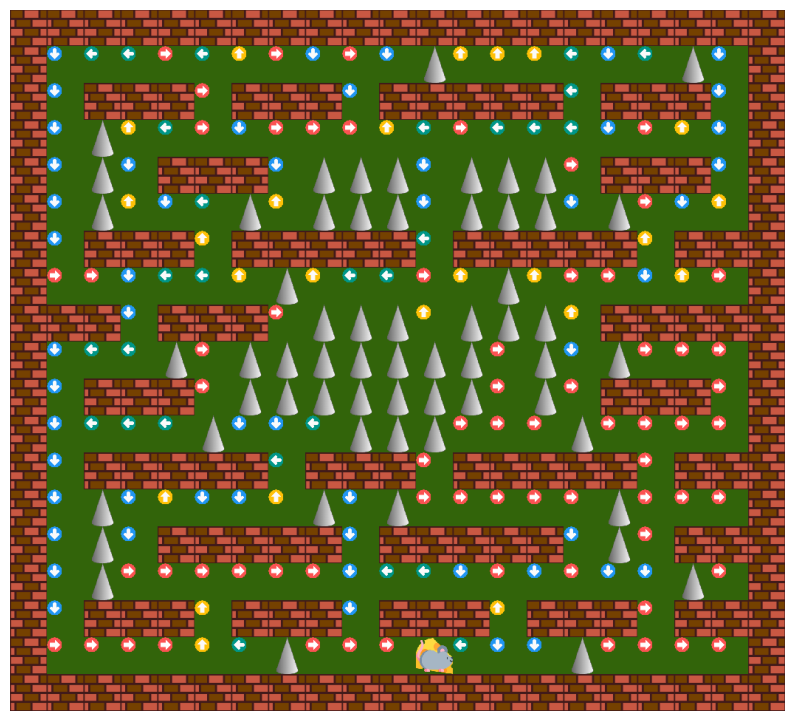

In [ ]:
# Q-learning 4 - decaying exploration rate
import numpy as np
import matplotlib.pyplot as plt
import random
from gridworld import GridWorld

# Q-learning parameters
alpha = 0.3  # Initial learning rate
gamma = 0.9  # Discount factor
epsilon = 0.8  # Initial exploration rate
episodes = 10000  # Total number of episodes to train

epsilon_decay = 0.995  # Epsilon decay rate

# Initialize Q-table
Q = np.zeros((env.state_count, 4))
q_learning_rewards = []

for episode in range(episodes):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        # Epsilon-greedy policy
        if random.uniform(0, 1) < epsilon:
            action = env.random_action()  # Explore
        else:
            action = np.argmax(Q[state])  # Exploit best known action

        # Take action, observe new state and reward
        next_state, reward, done, _ = env.step(action)
        total_reward += reward  # Track total reward

        # Q-learning update
        best_next_action = np.argmax(Q[next_state])
        td_target = reward + gamma * Q[next_state][best_next_action]
        Q[state][action] += alpha * (td_target - Q[state][action])  # Update Q-value
        state = next_state

    # Decay epsilon and learning rate
    epsilon = max(0.1, epsilon * epsilon_decay)

    q_learning_rewards.append(total_reward)  # Store episode reward

# Derive policy from Q-table
pi_q = np.argmax(Q, axis=1)
print("Q-Learning Policy:", pi_q)
print(Q)

pi = np.argmax(Q, axis=1)

print("Pi:", pi)

screenshot = env.getScreenshot(pi)  # Get the screenshot

# Use the imshow method from matplotlib to display the image

plt.figure(figsize=(10, 10))  #  Adjust the image size as needed

plt.imshow(screenshot)

plt.axis('off')  # Hide the coordinate axis

plt.show()


Q-Learning Policy: [1 2 2 2 3 3 1 3 2 3 0 3 2 3 0 0 1 0 0 1 1 3 0 2 1 0 0 2 3 3 1 2 3 0 2 3 3
 3 1 2 2 1 2 1 0 3 2 0 0 0 1 0 0 0 0 1 1 0 3 0 3 0 1 0 0 0 1 0 0 0 1 0 3 2
 1 1 1 1 2 0 0 1 2 2 2 0 3 2 2 3 3 0 3 3 0 3 3 3 1 0 0 0 0 3 0 0 0 3 1 2 2
 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 2 2 2 0 0 1 1
 0 0 0 0 0 0 0 0 0 0 0 1 2 0 0 1 0 3 1 1 0 3 0 1 0 0 0 0 0 0 0 0 0 0 1 0 3
 1 1 0 0 1 0 0 0 0 0 0 0 1 2 2 1 1 1 0 1 1 0 0 1 3 1 1 0 0 0 0 0 3 2 0 0 0
 0 0 1 0 1 0 0 0 0 0]
Value Iteration Policy: [1 2 2 2 1 2 2 2 1 2 2 0 0 0 1 2 2 2 1 1 1 1 1 1 1 2 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 1 3 2 3 3 3 2 3 3 3 3 1 2 0 0 1 2 3 2 2 0 3 2 2 0 3 2 0 0
 3 1 1 3 3 0 0 1 2 2 2 2 0 0 0 3 2 2 0 0 0 3 2 2 1 2 3 3 0 3 2 1 0 3 1 2 2
 2 1 2 3 1 3 0 3 0 1 0 3 0 0 0 1 1 2 1 1 1 1 0 1 0 1 0 3 1 1 2 2 2 0 0 1 2
 2 0 1 0 0 1 0 0 1 2 2 1 1 1 1 1 0 1 2 2 2 2 0 1 2 0 0 0 0 1 2 1 2 2 1 0 1
 1 1 1 1 1 0 0 0 0 0 0 0 1 2 0 0 1 2 2 2 2 2 0 1 3 1 1 3 0 0 0 0 0 0 0 0 0
 0 1 2 2 2 2 2 2 2 2]


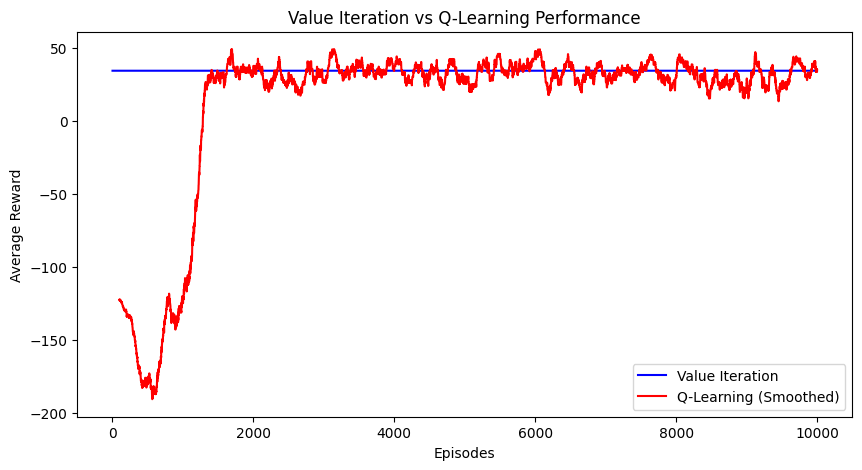

In [ ]:
# Comparison 2 - Q-learning now has decay rate
import numpy as np
import matplotlib.pyplot as plt
import random
from gridworld import GridWorld

# Q-learning parameters
alpha = 0.8  # Initial learning rate
gamma = 0.8  # Discount factor
epsilon = 0.8  # Initial exploration rate
episodes = 10000  # Total number of episodes to train

alpha_decay = 0.99  # Learning rate decay
epsilon_decay = 0.995  # Epsilon decay rate

# Initialize Q-table
Q = np.zeros((env.state_count, 4))
q_learning_rewards = []

for episode in range(episodes):
    state = env.reset()
    done = False
    total_reward = 0

    while not done:
        # Epsilon-greedy policy
        if random.uniform(0, 1) < epsilon:
            action = env.random_action()  # Explore
        else:
            action = np.argmax(Q[state])  # Exploit best known action

        # Take action, observe new state and reward
        next_state, reward, done, _ = env.step(action)
        total_reward += reward  # Track total reward

        # Q-learning update
        best_next_action = np.argmax(Q[next_state])
        td_target = reward + gamma * Q[next_state][best_next_action]
        Q[state][action] += alpha * (td_target - Q[state][action])  # Update Q-value
        state = next_state

    # Decay epsilon and learning rate
    epsilon = max(0.1, epsilon * epsilon_decay)
    alpha = max(0.1, alpha * alpha_decay)

    q_learning_rewards.append(total_reward)  # Store episode reward

# Derive policy from Q-table
pi_q = np.argmax(Q, axis=1)
print("Q-Learning Policy:", pi_q)

# Value Iteration Implementation
V = np.zeros((env.state_count, 1))
V_prev = np.random.random((env.state_count, 1))
eps = 1e-7
gamma = 0.8
value_iteration_rewards = []

while np.abs(V - V_prev).sum() > eps:
    Q_sa = env.R_sa + gamma * np.squeeze(np.matmul(env.P_sas, V), axis=2)
    V_prev = V.copy()
    V = np.max(Q_sa, axis=1, keepdims=True)

pi_vi = np.argmax(Q_sa, axis=1)
print("Value Iteration Policy:", pi_vi)

# Simulate reward tracking for Value Iteration
for episode in range(episodes):
    total_reward = np.mean(V)
    value_iteration_rewards.append(total_reward)

# Apply moving average smoothing
window_size = 100
q_learning_smooth = np.convolve(q_learning_rewards, np.ones(window_size)/window_size, mode='valid')

# Plot the reward comparison
plt.figure(figsize=(10, 5))
plt.plot(range(1, episodes + 1), value_iteration_rewards, label="Value Iteration", color="blue")
plt.plot(range(window_size, episodes + 1), q_learning_smooth, label="Q-Learning (Smoothed)", color="red")
plt.xlabel("Episodes")
plt.ylabel("Average Reward")
plt.title("Value Iteration vs Q-Learning Performance")
plt.legend()
plt.show()
